# Data pre-processing  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df=pd.read_csv('hitters.csv')
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [115]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [116]:
df.shape

(322, 20)

In [140]:
df.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [160]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
df.Division=lbe.fit_transform(df.Division) # E-0 , W-1
print(lbe.classes_)
df.League=lbe.fit_transform(df.League) # A-0 , N-1 
print(lbe.classes_)
df.NewLeague=lbe.fit_transform(df.NewLeague) # A-0 , N-1
print(lbe.classes_)

['E' 'W']
['A' 'N']
['A' 'N']


In [161]:
temp=df['Salary']
df.drop('Salary',axis=1,inplace=True)
df['Salary']=temp

In [210]:
colnames=[]
for i in df.columns:
    colnames.append(i)

### Creating plots  

In [222]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10,14))
    i=0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(9,3,i)
        plt.plot(df[col],df['Salary'],marker='.',linestyle='none')
        plt.title(title %(col))
        plt.tight_layout()

20


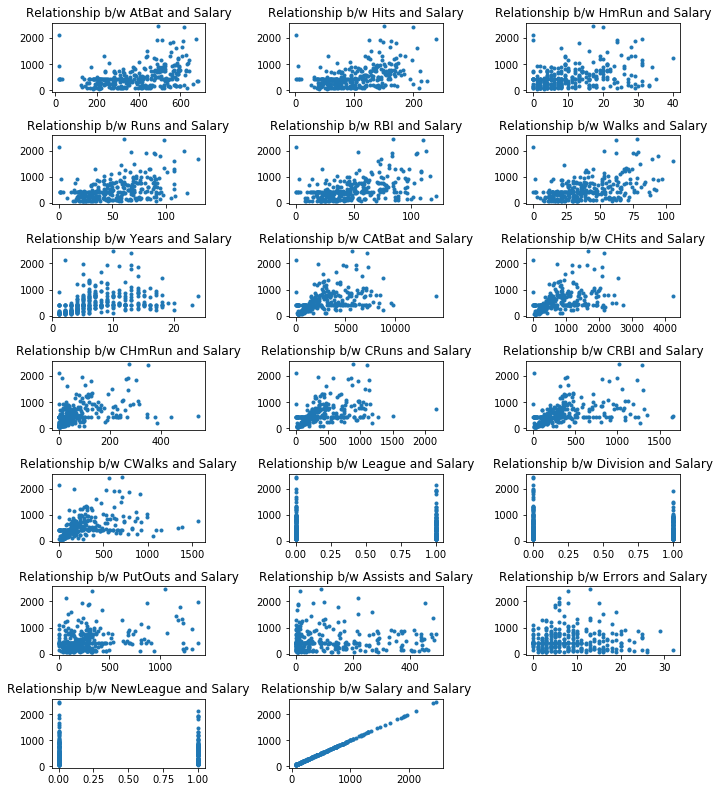

In [223]:
plotFeatures(colnames,'Relationship b/w %s and Salary')

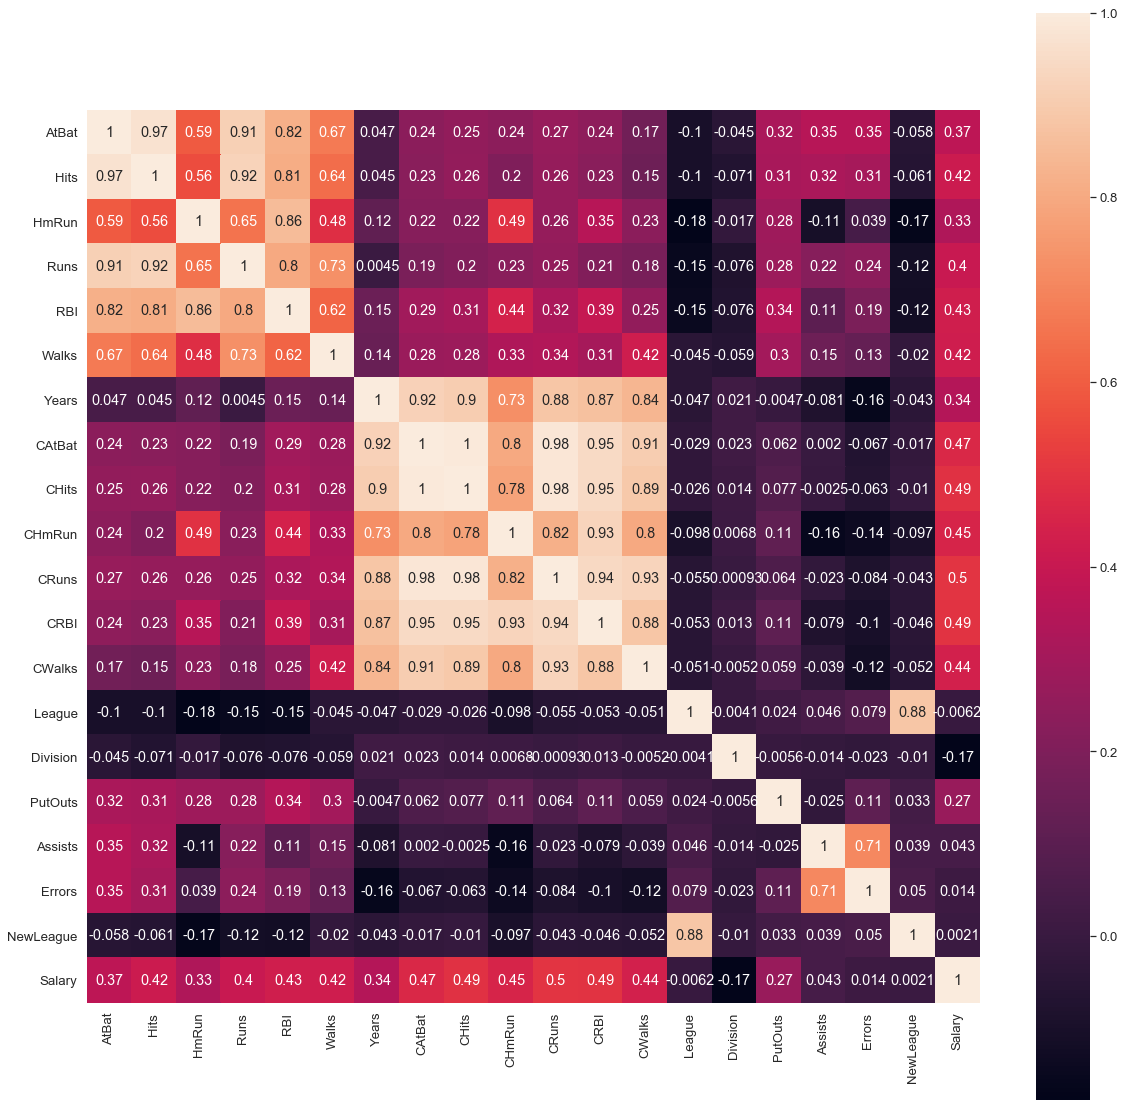

In [232]:
fig=plt.subplots(figsize=(20,20))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),square=True,cbar=True,annot=True)

Watch how salary is related to other fields

In [163]:
df.to_csv('clean_data_hitters.csv') #saving the clean data to another file


# Linear Model

In [164]:
dataset= np.genfromtxt("clean_data_hitters.csv", delimiter=",",skip_header=1)
dataset[:,1:-1].shape

(322, 19)

In [165]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

x=dataset[:,1:-1]
x=normalize(x)
y=dataset[:,-1]
y=y.reshape((-1,1))

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(y) 
y = scaled_values

In [166]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4,random_state=0)

###  Initializing weights and making prediction

In [197]:
weights= np.random.rand(x_train.shape[1], 1)
h=np.dot(x_train,weights) 

### Hyperparameters

In [198]:
alpha=0.05 #learning rate
epoch=1000000 #iterations

### Defining cost function


In [ ]:
def cost(h,y):
    return((h-y)**2).mean()/2

### Model Training  

In [199]:
cost_list=[]
for i in range(epoch):
    if i%100==0:
        cost_list=np.append(cost_list,cost(h,y_train)) #creating a cost list
        cost_list=np.array(cost_list)                  #typecasting it into np.ndarray
    h=np.dot(x_train,weights)                          #calculating hypothesis
    error=np.mean((h-y_train)**2)                      #calculating loss
    weights=weights-alpha*(1/x_train.shape[0])*np.dot(np.transpose(x_train),(h-y_train)) #weight update equation

### Creating Plot of Cost vs Epoch

Text(0.5, 1.0, 'Cost vs Epoch')

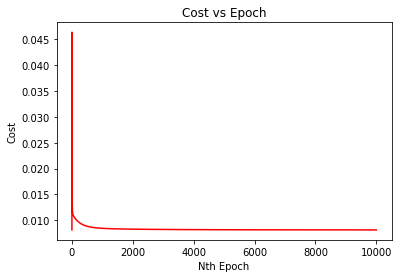

In [201]:
plt.plot(np.arange(epoch/100),cost_list,'r')
plt.xlabel('Nth Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')

The cost is very high at fisrt but decreases considerably at later

### Final Prediction

In [200]:
op= np.dot(x_test, weights) #final output

### Evaluating the model 

In [202]:
from sklearn.metrics import r2_score
r2_score(y_test,op)

0.39702758149170303

The accuracy is low here because the dataset is made for Lasso regression and we here performed linear regression

This code is just to show you how to implement Linear Regression form scratch